# ***AG Missing Values Workspace for Project 1: Housing Prices***

## Importing and inspecting our House Prices Dataset
Below I am going to inspect the dataset we are working with: 
The file 'kc_house_data.csv' will be imported and inspected.

In [8]:
# Importing Matplotlib, numpy, and pandas and matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
#Accessing the data with pandas read dataframe method and assigning it to house_data:
house_data = pd.read_csv('kc_house_data.csv')


And inspecting the first 5 rows 

In [4]:
house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


### Dealing with the Missing Values:

Using .isna() and .sum() we return a complementary dataframe with sums of all the True isna() values. These show our missing (NaN) values.

In [6]:
house_data.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64



Now that we know how mnay missing values we have in each column, we will deal with each column individually

### Inspect the datatypes the missing columns: 

We pull up an info() method on the data and find that the offending columns are all type float64



In [10]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


### Finding the percentages of missing values:

From our info above we have an idea of how many entries we have in each column

A quick length of the 'waterfront' column shows that we have many more entries than missing entries.

Dividing the missing entries by the length of the waterfont column multiplied by 100 (rounded to 2) shows us that the % of the missing values is 10.95%

we print these in f'string format to show thei respective percetages.

In [39]:
#For waterfront column:
water_m_pcent = round(2367 / len(house_data.waterfront) * 100,2)
print(f'The percentage of missing data in the waterfront column is {water_m_pcent}%')

#For view column:
view_m_pcent = round(63 / len(house_data.view) * 100 ,2)
print(f'The percentage of missing data in the view column is {view_m_pcent}%')

#For yr_rennovated column:
yr_ren_m_pcent = round(3842 / len(house_data.yr_renovated) * 100 ,2)
print(f'The percentage of missing data in the yr_renovated column is {yr_ren_m_pcent}%')

The percentage of missing data in the waterfront column is 10.96%
The percentage of missing data in the view column is 0.29%
The percentage of missing data in the yr_renovated column is 17.79%


## To Keep or Remove?


Noting that there is such a small percentage of these columns missing, it may be wisest to just remove them. 

I dont think keeping waterfront or view missing data is useful. Perhaps keeping missing data for yr_renovated could tell us these are older houses. I may want to make some coarse classification on the yr_renovated column also known as binning...





Even so at the moment lets just remove the missing values in the other two columns


In [63]:
# using house_data.dropna() we remove the missing values (subset removes from the columns we pass in only)
house_data.dropna(subset=['waterfront', 'view'], inplace = True)


In [64]:
#check the isna sum list again:
house_data.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3402
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Great we have removed missing data from columns: Waterfront and View , nice going.

## Missing data in the year_renovated column
I have a feeling this column might be goot to keep around, ets inspect the distribution of the values


I plot a histogram on the column yr_renovated. The bins parameter will be the len of the unique list of the column.




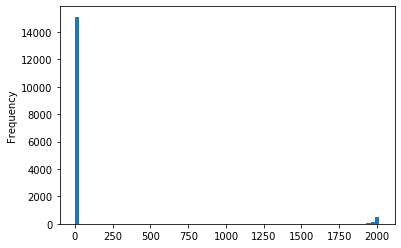

In [70]:
#This len and unique function chain returns how many years there are uniquely in yr_renovated. We can use that for our bin size
len(house_data.yr_renovated.unique())
house_data['yr_renovated'].plot(kind='hist', bins=71)


Well.. it looks like there are a lot of placeholder values...

In [74]:
house_data.yr_renovated.value_counts(normalize=True)

0.0       0.958698
2014.0    0.004060
2013.0    0.001840
2005.0    0.001713
2000.0    0.001586
            ...   
1953.0    0.000063
1950.0    0.000063
1954.0    0.000063
1959.0    0.000063
1971.0    0.000063
Name: yr_renovated, Length: 70, dtype: float64

95% of that columns values in fact.
I would like to keep these values around as it may be important to be able to say wether the knowledge of the houses renovation affects the price. 

Therefore I will do some coarse classification:

### Coarse Classification for yr_renovated

In [77]:
house_data.date.nunique()


369